# Rodada de testes 1 - GP

## Rodando os testes

In [1]:
import duckdb
from stations_selections_utils import testar_multiplos_parametros_gp,precalcular_distancias_intersecoes,get_distancias,get_intersecoes
import os

In [ ]:
# Explorando diversos cenários para as estações vizinhas
ouro_conn = duckdb.connect('ouro_db')
os.makedirs("testes_goal_programming", exist_ok=True)

valores_peso_distancia = [1, 2, 5, 10]
valores_peso_intersecao = [1]
valores_min_estacoes_candidatas = [2]
valores_max_estacoes_candidatas = [4]
valores_max_distancia = [20, 50, 100]
valores_min_intersecao = [80, 160]

estacoes = ouro_conn.execute('select distinct id_estacao from dim_estacoes').fetch_df()['id_estacao'].tolist()
distancias_dict, intersecoes_dict = precalcular_distancias_intersecoes(estacoes,get_distancias,get_intersecoes,ouro_conn)

testar_multiplos_parametros_gp(valores_peso_distancia,valores_peso_intersecao,valores_min_estacoes_candidatas,valores_max_estacoes_candidatas,valores_max_distancia,valores_min_intersecao,estacoes,distancias_dict,intersecoes_dict)

## Analisando os testes

In [1]:
import json
from stations_selections_utils import gerar_relatorio_vizinhas,comparar_tentativas_vizinhas
import duckdb

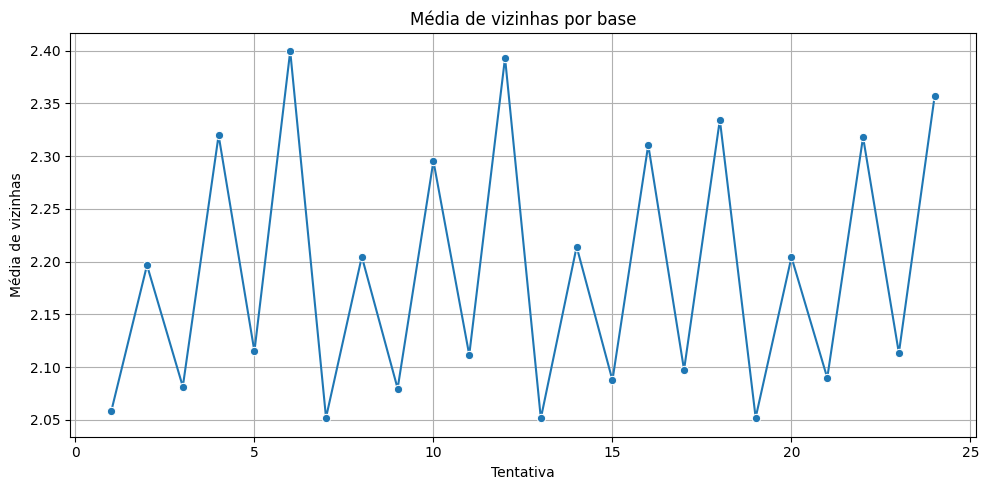

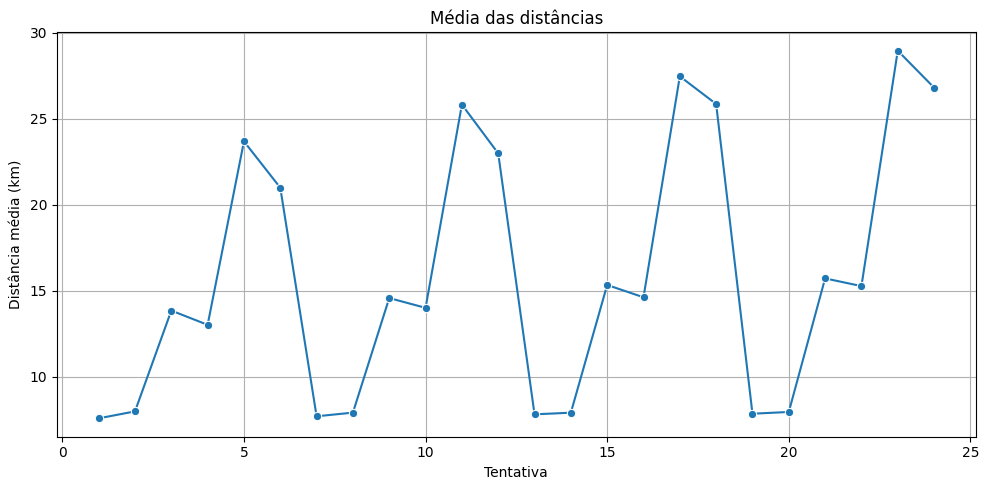

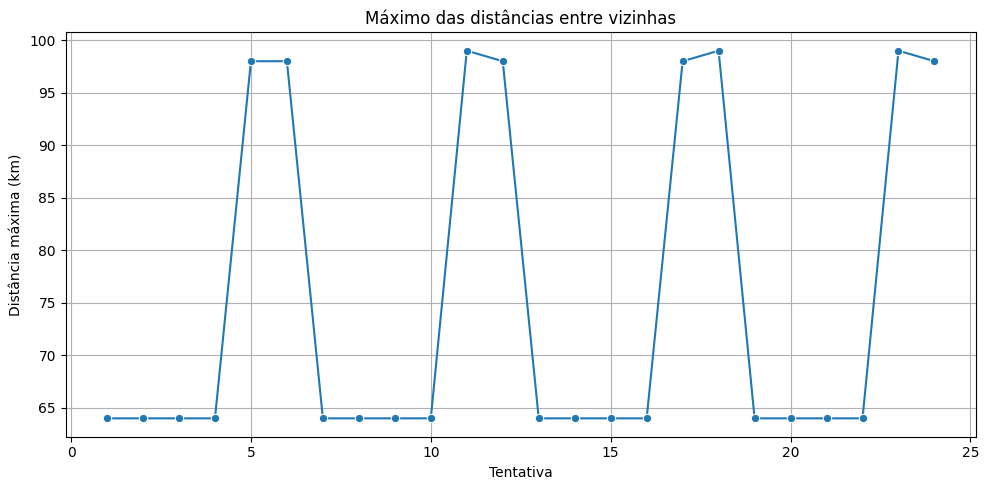

In [2]:
path_prefix = 'testes_goal_programming/tentativa_'
numeros_tentativas = range(1,25)
paths = {n_tentativa:f'{path_prefix}{n_tentativa}.json' for n_tentativa in numeros_tentativas}
tentativas = {}
for n_tentativa,path in paths.items():
    with open(path, 'r', encoding='utf-8') as f:
        data = json.load(f)
        tentativas[n_tentativa] = data


ouro_conn = duckdb.connect('ouro_db')
fato_estacoes_distancia = ouro_conn.execute("select * from fato_estacoes_distancia").fetchdf()

resumo = comparar_tentativas_vizinhas(
    tentativas=tentativas.values(),
    df_distancias=fato_estacoes_distancia,
    plotar=True
)

In [3]:
resumo

,tentativa,num_bases,total_vizinhas,media_vizinhas_por_base,media_das_distancias,max_das_distancias
0,1,4455,9168,2.057912,7.582435,64
1,2,4455,9786,2.196633,7.987093,64
2,3,4455,9273,2.081481,13.844632,64
3,4,4455,10335,2.319865,13.016199,64
4,5,4455,9422,2.114927,23.677460,98
5,6,4455,10690,2.399551,20.984530,98
6,7,4455,9142,2.052076,7.701422,64
7,8,4455,9822,2.204714,7.914403,64
8,9,4455,9265,2.079686,14.572185,64
9,10,4455,10226,2.295398,14.003124,64


In [3]:
resumo

,tentativa,num_bases,total_vizinhas,media_vizinhas_por_base,media_das_distancias,max_das_distancias
0,1,4455,9168,2.057912,8.064925,64.7
1,2,4455,9786,2.196633,8.471235,64.7
2,3,4455,9273,2.081481,14.333817,64.7
3,4,4455,10335,2.319865,13.505187,64.7
4,5,4455,9422,2.114927,24.167015,64.7
5,6,4455,10690,2.399551,21.477264,64.7
6,7,4455,9142,2.052076,8.183955,64.7
7,8,4455,9822,2.204714,8.395755,64.7
8,9,4455,9265,2.079686,15.064003,64.7
9,10,4455,10226,2.295398,14.493354,64.7


In [3]:
n_tentativa = 1
tentativa = tentativas[n_tentativa]

# Numero de estações
gerar_relatorio_vizinhas(tentativa['id_estacoes_vizinhas'],fato_estacoes_distancia)

📊 RELATÓRIO GERAL DAS ESTAÇÕES VIZINHAS
Total de estações base analisadas: 4455
Total de estações vizinhas atribuídas: 9168
Média de vizinhas por estação base: 2.06
Máximo de vizinhas atribuídas a uma base: 4
Mínimo de vizinhas atribuídas a uma base: 2
--------------------------------------------------
Número de estações base com menos de 3 vizinhas: 4226
IDs das estações base com poucas vizinhas: ['921094', '921096', '925529', '926233', '920171', '920206', '920240', '920346', '920379', '920386', '920430', '920451', '920462', '920470', '920477', '920481', '920523', '920533', '920649', '920657', '920677', '920678', '920694', '920696', '920779', '920838', '920864', '920912', '920930', '920995', '921011', '921012', '921026', '921061', '921062', '921077', '921079', '921267', '921352', '921361', '921363', '921712', '921721', '921732', '921736', '921753', '921769', '921780', '921781', '921786', '921788', '921822', '921823', '921824', '921847', '921884', '921907', '921910', '922055', '922060'

In [21]:
mean_estacoes_vizinhas_selecionadas

2.0579124579124577